In [1]:
import numpy as np 
import pandas as df
import matplotlib.pyplot as plt

In [2]:
x=np.round(100*np.random.rand(200))
x=np.round(x-x.mean())
x.sort()
y=x**2 + np.random.normal(-200,200,x.size)

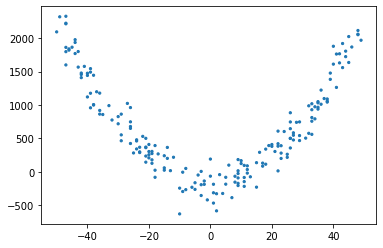

In [6]:
plt.scatter(x,y,s=np.full(x.size,5))

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [107]:
#x_train,x_test,y_train,y_test = train_test_split(x.reshape(x.size,1),y,test_size=0.2,random_state=12)

rand=np.random.permutation(np.arange(x.size))
rand_train = rand[:150]
rand_train.sort()
rand_test = rand[150: ]
rand_test.sort()

x_train = x.reshape(x.size,1)[rand_train]
y_train =y[rand_train]

x_test = x.reshape(x.size,1)[rand_test]
y_test = y[rand_test]

In [108]:
x_train.shape , y_train.shape

((150, 1), (150,))

In [109]:
gb = GradientBoostingRegressor(max_depth=2,n_estimators = 500, learning_rate=0.1)
gb.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=500)

In [110]:
gb.score(x_test,y_test)

0.8704184261969885

In [111]:

errors = [mean_squared_error(y_test,y_pred) for y_pred in gb.staged_predict(x_test)]
#print(errors)

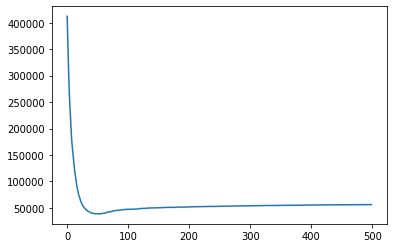

In [112]:
plt.plot(errors)

In [113]:
best_n_estimator = np.argmin(errors)
best_n_estimator

53

In [114]:
gb_best = GradientBoostingRegressor(max_depth=2, n_estimators = best_n_estimator)
gb_best.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=53)

In [115]:
y_pred = gb_best.predict(x_test)
mean_squared_error(y_test,y_pred)

38883.68867019568

In [121]:
gb_best.score(x_train,y_train)

0.9609533172421957

In [122]:
gb_best.score(x_test,y_test)

0.9105241517778266

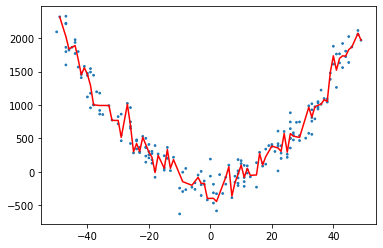

In [123]:
#old model 
plt.scatter(x,y,np.ones(x.size)*3)
plt.plot(x_train,gb.predict(x_train),'r')

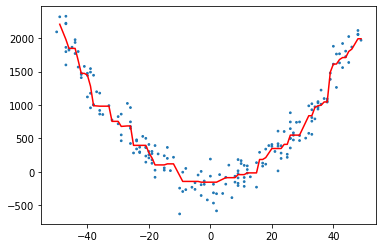

In [120]:
#best n_estimator new model
plt.scatter(x,y,np.ones(x.size)*3)
plt.plot(x_train,gb_best.predict(x_train),'r')